In [106]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow
import keras
import numpy as np
import math


In [51]:
from keras.datasets import cifar10

In [248]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [249]:
normalize = True
if normalize:
    x_train = np.float32(x_train) / 255.
    x_test = np.float32(x_test) / 255.
    y_train = np.float32(y_train) / 255.
    y_test = np.float32(y_test) / 255.

In [282]:

M = 2000 # first M principal components

# sample n_images digits from train dataset
whole_train_set = True
if whole_train_set:
    n_images = len(x_train)
    images = x_train
else:
    n_images = 10000
    indexes = np.random.randint(0, x_train.shape[0], size=n_images)
    images = x_train[indexes]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

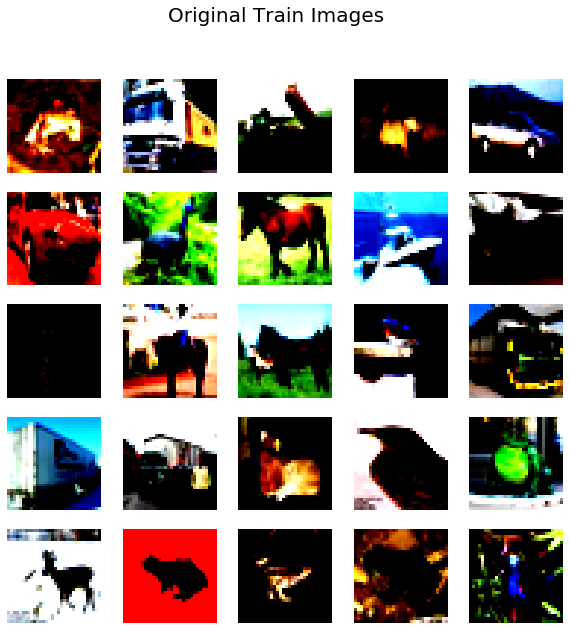

In [283]:
#util function for displaying images in a grid
def plot_images(images, title, n_images=25):
    plt.figure(figsize=(10,10))
    plt.suptitle(title, fontsize=20)
    side = int(math.sqrt(n_images))
    for i in range(n_images):
        plt.subplot(side, side, i + 1)
        image = images[i]
        plt.imshow(image, cmap='gray')
        plt.axis('off')

    plt.show()
    plt.close('all')
    
title = "Original Train Images"
plot_images(images, title=title)
orig_shape = images.shape

# PCA ALGORITHM

In [284]:
#mean subtraction
images = np.float32(images)
mu = np.mean(images)
images -= mu

In [285]:
#divide by standard deviation
std = np.std(images)
images /= std

In [286]:
print("Before mean: {0}, std: {1}".format(mu,std))
mu1 = np.mean(images)
std1 = np.std(images)
print("After mean: {0}, std: {1}".format(mu1,std1))

Before mean: -7.477317012671847e-06, std: 0.9999995827674866
After mean: 5.056063123731747e-09, std: 1.0000001192092896


### Formulate data matrix and covariance matrix 

In [287]:
#from numpy import linalg as la
from scipy import linalg as la

X = np.reshape(images,(-1,n_images))
S = np.matmul(X, np.transpose(X))/n_images
#D,B = la.eig(S,left=True,right=True)
D,B = la.eig(S,left=True,right=False)
print('X.shape: {0}'.format(X.shape))
print('S.shape: {0}'.format(S.shape))
print(B.shape)
print(D.shape)


X.shape: (3072, 50000)
S.shape: (3072, 3072)
(3072, 3072)
(3072,)


### Projection or Low-Rank Approximation of $\textbf{X}$:

In [288]:
BM = B[:,:M]
BM_BMT = np.matmul(BM,np.transpose(BM))
R = np.matmul(BM_BMT,X)
R = np.reshape(R, orig_shape)
print(R.shape)

(50000, 32, 32, 3)


### Backprojection:

In [289]:
R *= std
R += mu
R = np.clip(R, 0, 255)
mu1 = np.mean(R)
std1 = np.std(R)
print("After PCA mean: {0}, std: {1}".format(mu1,std1))

After PCA mean: 0.4070354104042053, std: 0.5942853093147278


### Plot the images with $\begin{equation}\textit{M}\end{equation}$ principal components

In [290]:
print("Before mean: {0}, std: {1}".format(mu,std))
mu1 = np.mean(R)
std1 = np.std(R)
print("After mean: {0}, std: {1}".format(mu1,std1))

Before mean: -7.477317012671847e-06, std: 0.9999995827674866
After mean: 0.4070354104042053, std: 0.5942853093147278


### Apply PCA on Test Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

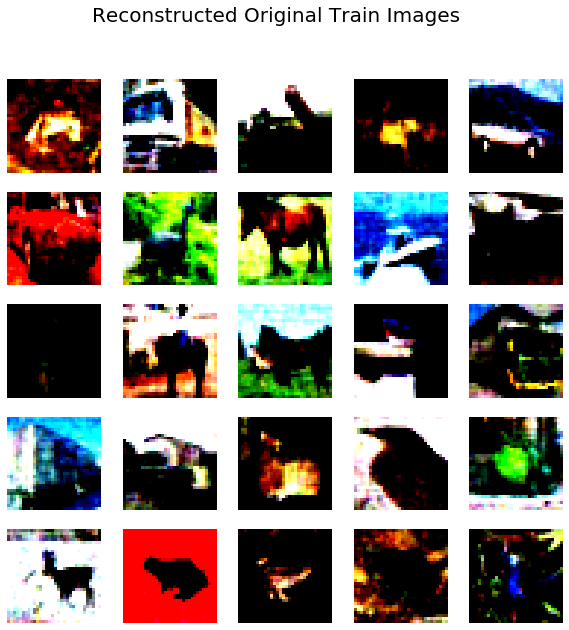

In [291]:
title = "Reconstructed Original Train Images"
plot_images(R, title=title)

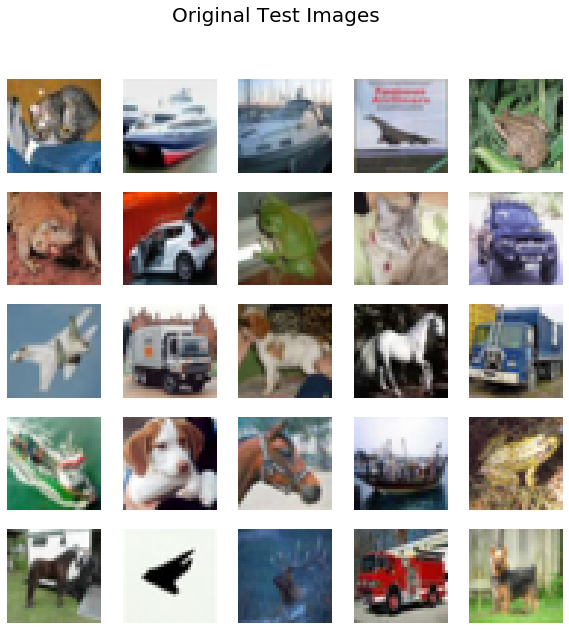

In [292]:
title = "Original Test Images"
plot_images(x_test, title=title)
test_shape = x_test.shape

### Plot reconstructed test images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


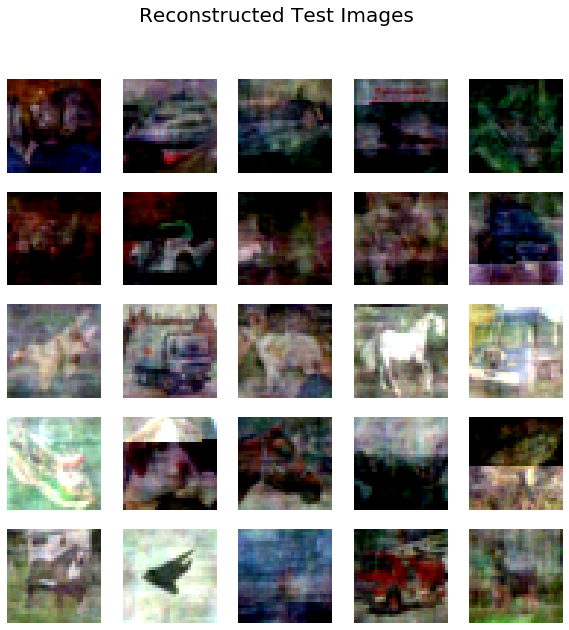

In [293]:
X = np.float32(np.reshape(x_test,(-1,x_test.shape[0])))
R = np.matmul(BM_BMT,X)
R = np.reshape(R, test_shape)
R = np.clip(R, 0, 255)
title = "Reconstructed Test Images"
plot_images(R, title=title)